In [1]:
from konlpy.corpus import kolaw
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

In [2]:
okt = Okt()

fids = kolaw.fileids()
fobj = kolaw.open(fids[0])

# 첫 140 문자를 읽어와달라
# print(fobj.read(140))

In [3]:
fobj = kolaw.open(fids[0])

# 전체 문장을 읽어와 ko_doc에 저장
ko_doc = fobj.read()

In [4]:
wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Users\kbgi0\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf')

# ko_doc을 단어 단위로 쪼개서 그거에 대한 개수를 하나씩 세줌
count = Counter(ko_doc.split())
wc = wc.generate_from_frequencies(count)

# 빈도수 상위 20개 확인하기 - 쓸 데 없는 ① 이런게 포함되어 있음
count.most_common(20)

[('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다.', 57),
 ('한다.', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('모든', 30),
 ('법률로', 30),
 ('정한다.', 28),
 ('위하여', 26),
 ('가진다.', 25),
 ('아니한다.', 25),
 ('및', 25)]

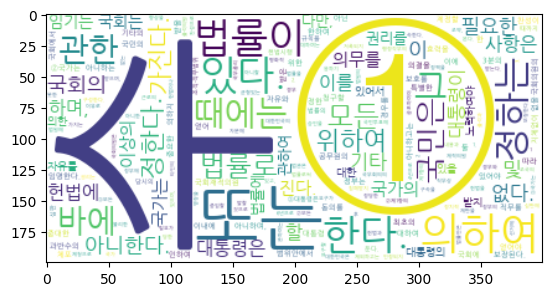

In [5]:
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [6]:
ko_doc_noun = okt.nouns(ko_doc)

# ko_doc에서 ①, 있다, 의하여 << 이런거 제외하고, 법률의/법률이 이런 것도 다 법률 하나로 통일해서 명사만 추출한거 출력
# print(ko_doc_noun)

In [7]:
count_noun = Counter(ko_doc_noun)

wc_noun = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Users\kbgi0\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

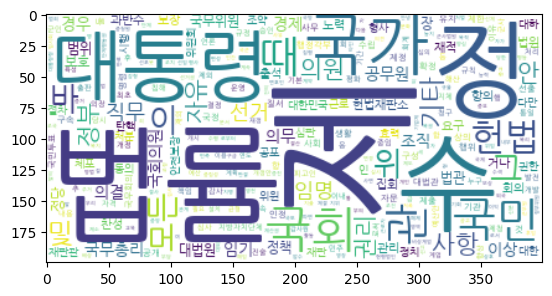

In [8]:
plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

In [9]:
'''
그래프를 확인했을 때, 제 / 정 / 수 등 필요없는 단어임에도 자주 등장해 크게 나타나는 경향이 있음.

# 자주 등장하는 단어를 확인하고 필요없는 단어를 확인함
count_noun.most_common()

# 확인 이후 pop()해서 제거
count_noun.pop('제')
count_noun.pop('정')
count_noun.pop('수')
count_noun.pop('관')
count_noun.pop('때')
count_noun.pop('그')
count_noun.pop('이')
count_noun.pop('바')
count_noun.pop('위')


위처럼 수작업으로 제거할 수도 있지만, 저렇게말고도 및, 안 등 여러 글자가 더 존재. -> 한글자인 단어를 모두 제외하는 반복문 작성
'''

stopword_list = []

# 한 글자짜리 단어를 stopword_list에 삽입
for noun_word in count_noun:
    if len(noun_word) == 1:
        stopword_list.append(noun_word)

# stopword_list에 들어있는 단어를 pop() 한다.
for stopword in stopword_list:
    count_noun.pop(stopword)

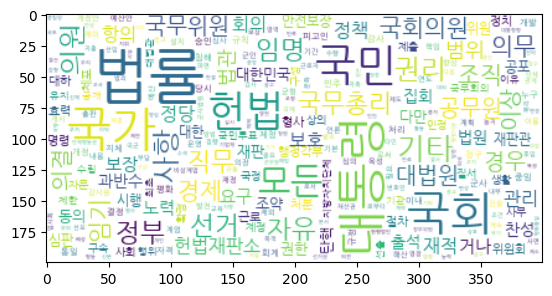

In [10]:
wc_noun = wc_noun.generate_from_frequencies(count_noun)

plt.imshow(wc_noun, interpolation="bilinear")
plt.show()

## 그림 안에 워드 클라우드 그리기

In [11]:
img_mask = np.array(Image.open('law.jpg'))

wc_img = WordCloud(background_color="white", max_words=2000, font_path=r'C:\Users\82107\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf', mask=img_mask)
wc_img = wc_img.generate_from_frequencies(count_noun)

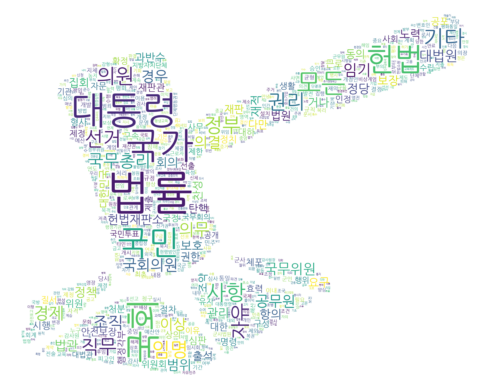

In [12]:
plt.imshow(wc_img, interpolation="bilinear")
plt.axis('off')
plt.show()